<a href="https://colab.research.google.com/github/SAIKUMAR-AI/Netflix-Clustering/blob/main/Netflix_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    -  Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Pendiyala Sai Kumar


# **Project Summary -**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.
Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **GitHub Link -**

https://github.com/SAIKUMAR-AI/Netflix-Clustering

# **Problem Statement**


Based on the third company report we got an analysis for Netflix which is TV Shows increasing rapidly over then movies.

The goal of this project is to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
from google.colab import drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib  inline
import seaborn as sns
import plotly.express as px
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS


### Dataset Loading

In [ ]:
# Load Dataset
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/AlmaBetter/CapstoneProject/Netflix/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
data.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

### Dataset Information

In [ ]:
# Dataset Info
data.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
for col in data.columns:
  duplicate = data.pivot_table(columns = [col], aggfunc='size')
  col
  if (duplicate.count() >1):
    duplicate
    print(duplicate)


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

In [ ]:
# Visualizing the missing values
msno.bar(data)

### What did you know about your dataset?


Netflix clustering analysis data
1. The missing values in the director, cast, and country attributes can be  replaced with 'Unknown'
2. 10 records with missing values in the date_added column can be dropped.
3. The missing values in rating can be imputed with its mode, since this attribute is discrete.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
col = data.columns
col

In [ ]:
# Dataset Describe
data.describe(include = 'all')

### Variables Description 

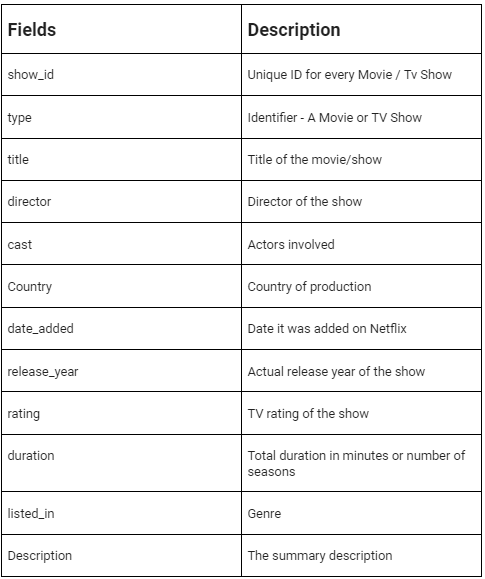

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for col in data.columns.tolist():
  print("unique values ",col," = ",data[col].nunique())

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

#Handling Null values.
data[['cast','country','director']] = data[['cast','country','director']].fillna('Unknown')
data['rating'] = data['rating'].fillna(data['rating'].mode()[0])
data.dropna(axis=0,inplace=True)

In [ ]:
data.shape

In [ ]:
# Top Countries
data['country'].value_counts()

In [ ]:
# Genre of shows
data['listed_in'].value_counts()

In [ ]:
# Choosing the primary country and primary genre to simplify the analysis
data['country'] = data['country'].apply(lambda x: x.split(',')[0])
data['listed_in'] = data['listed_in'].apply(lambda x: x.split(',')[0])

In [ ]:
#Number of movies/shows from country
data['country'].value_counts()

In [ ]:
#Type of shows 
data['listed_in'].value_counts()

In [ ]:
#Typecasting duration from string to integer
data['duration']=data['duration'].apply(lambda x:int(x.split()[0]))

In [ ]:
data.duration.dtype

In [ ]:
#Typecasting date_added from string to date and time
data['date_added']=pd.to_datetime(data['date_added'])

In [ ]:
#can see the starting and ending of movies added date
data.date_added.min(), data.date_added.max()

In [ ]:
#Creating new attributes month and year referrence from date_added
data['month']=data['date_added'].dt.month
data['year']=data['date_added'].dt.year
data.drop('date_added', axis=1,inplace=True)

In [ ]:
#Changing ratings into age restrictions
sns.countplot(x = 'rating', data=data)

In [ ]:
data.rating.unique()

In [ ]:
#changing rating values 
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

data['rating'].replace(rating_map, inplace = True)
data['rating'].unique()

In [ ]:
sns.countplot(x='rating', data=data)

In [ ]:
country=data.groupby('country').count()
country

In [ ]:
year_count=data.groupby('release_year').count()
year_count

In [ ]:
listed_count=data.groupby('listed_in').count()
listed_count

In [ ]:
duration_count=data.groupby('duration').count()
duration_count

### What all manipulations have you done and insights you found?

Removed NULL values for data consitency.
Grouping some features to check range of that values.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
data.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

##### 1. Why did you pick the specific chart?

To Know the Percentage of Movies and TV shows.

##### 2. What is/are the insight(s) found from the chart?

There are more movies then TV shows

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Handling both TV Shows and Movies is an challenging task for an netflix

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
# Top 10 directors in the dataset
plt.figure(figsize=(10,5))
data[~(data['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 directors')

##### 1. Why did you pick the specific chart?

We will see the top 10 directors in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Rahul Campos and Jan Suter both together directed 18 movies/TV shows.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(10,5))
data[~(data['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='barh')
plt.title(' Top 10 countries')

##### 1. Why did you pick the specific chart?

As analysis the plot will know the top ten countries in the dataset which have more movies/TV shows.

##### 2. What is/are the insight(s) found from the chart?

AS we see the bar plots the United States have more number of TV shows and movies and followed by India, United Kingdom.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Needs to improve and analysis on the other countries.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(10,5))
sns.histplot(data['release_year'])
plt.title('distribution by released year')

##### 1. Why did you pick the specific chart?

Distribution of this graph giving the information anbout in which year movies/TV shows released.

##### 2. What is/are the insight(s) found from the chart?

2018 is the higest year which contains more number of movies/TV shows followed by 2017, 2019.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As comparing the releasing year data in dataset after 2018 its slowly decreasing the number of TV shows/movies.

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
# Number of shows added on different months
plt.figure(figsize = (10,5)) 
sns.countplot(data['month'])
plt.title('Shows added each month')
plt.xlabel('')

##### 1. Why did you pick the specific chart?

Monthly analysis as per given dataset

##### 2. What is/are the insight(s) found from the chart?

October, November, December and January months have the peak time which contains more data.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Will understand the data which month having more data as well as least data in other months.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize = (10,5)) 
sns.countplot(data['year'])
plt.title('Number of shows added each year')
plt.xlabel('')

##### 1. Why did you pick the specific chart?

The data contains which year movie or TV shows added.

##### 2. What is/are the insight(s) found from the chart?

Netflix continuous to add more shows on its platform over the years.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is a decrease in the number of shows added in the year 2020, which might be attributed to the covid-19-induced lockdowns, which halted the creation of shows.
We have Netflix data only up to 16th January 2021, hence there are less movies added in this year.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
# Number of shows released each year since 2008
order = range(2008,2022)
plt.figure(figsize=(10,5))
p = sns.countplot(x='release_year',data=data, hue='type',
                  order = order)
plt.title('Number of shows released each year since 2008 that are on Netflix')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

##### 1. Why did you pick the specific chart?

This plot will gives the both movies and shows each year. 

##### 2. What is/are the insight(s) found from the chart?

1. Over the years, Netflix has consistently focused on adding more shows in its platform.
2. Though there was a decrease in the number of movies added in 2020, this pattern did not exist in the number of TV shows added in the same year.
3. This might signal that Netflix is increasingly concentrating on introducing more TV series to its platform rather than movies.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
# Seasons in each TV show
plt.figure(figsize=(10,5))
p = sns.countplot(x='duration',data=data[data['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

##### 1. Why did you pick the specific chart?

Gives the information about which show have the more seasons.

##### 2. What is/are the insight(s) found from the chart?

The TV series in the dataset have up to 16 seasons, however the bulk of them only have one. 
There are very few TV shows that have more than 8 seasons.

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(10,5))
sns.histplot(x='duration',data=data[data['type']=='Movie'])
plt.title('Movie duration distribution')

##### 1. Why did you pick the specific chart?

Length of movie analysis.

##### 2. What is/are the insight(s) found from the chart?

In [ ]:
data[data['type']=='Movie'].duration.describe()

The minimum duration of 3 minutes and maximum is 312 minutes.

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
# Top 10 genre for movies
plt.figure(figsize=(10,5))
data[data['type']=='Movie'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for movies')

##### 1. Why did you pick the specific chart?

In movies which type of Genre having the more data.

##### 2. What is/are the insight(s) found from the chart?

Dramas, comedy and documentry have more movies.

#### Chart - 11

In [ ]:
# Chart - 11 visualization code
# Top 10 genre for movies
plt.figure(figsize=(10,5))
data[data['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for movies')

##### 1. Why did you pick the specific chart?

As we know the more type of data in Genre we can see in the tv shows.

##### 2. What is/are the insight(s) found from the chart?

International TV Shows, Kids TV, Crime TV Show have the more popular.

#### Chart - 12

In [ ]:
# Chart - 12 visualization code
# Average movie length over the years
plt.figure(figsize=(10,5))
data[data['type']=='Movie'].groupby('release_year')['duration'].mean().plot(kind='hist')
plt.title('Average movie length')
plt.ylabel('Movie length (minutes)')
plt.xlabel('Year')

##### 1. Why did you pick the specific chart?

Average movie length in a year.

##### 2. What is/are the insight(s) found from the chart?

After 2000 year netflix movies have been continuosly decerasing.

#### Chart - 13

In [ ]:
# Chart - 13 visualization code
comment_words = ''
stopwords = set(STOPWORDS)

for term in data.description.values:
    
    # typecaste each val to string
    term = str(term)

    # split the value
    tokens = term.split()  
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image                      
plt.figure(figsize = (14,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

##### 1. Why did you pick the specific chart?

plotting the some key words which contains from the Netflix data

##### 2. What is/are the insight(s) found from the chart?

Type of keywords from Netflix dataset like: family, friend, find, love, woman, young, man, love etc

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

corr_matrix=data.corr()
 
# plot it
sns.heatmap(corr_matrix, cmap='PuOr')

##### 1. Why did you pick the specific chart?

Calculate correlation between each pair of variable

##### 2. What is/are the insight(s) found from the chart?

Here the correlation range -0.2 to 1.0.
Whenever its corelating with self column we will get the higher corelation and with other column we are -0.2 to 0.2 approx.

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code
sns.pairplot(data)

##### 1. Why did you pick the specific chart?

Pair plot Analysis: Gives the dataset distribution.

##### 2. What is/are the insight(s) found from the chart?

The pair plot taken features as follows: release_year, duration, month, year.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***